In [2]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print (y_train)


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


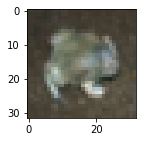

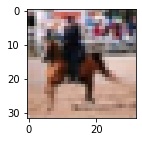

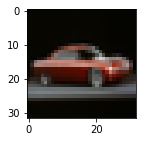

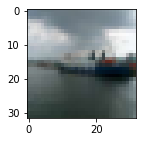

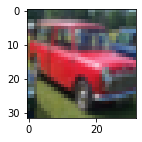

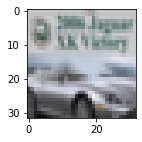

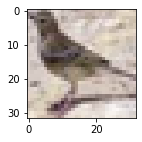

In [7]:
for i in range(132,139):
   plt.subplots(figsize=(2,2))
   img = X_train[i]
   plt.imshow(img)


In [11]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255


n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten


model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))


# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 561s 1s/step - loss: 1.6194 - accuracy: 0.4052 - val_loss: 1.1876 - val_accuracy: 0.5802
Epoch 2/10
391/391 [==============================] - 536s 1s/step - loss: 1.1336 - accuracy: 0.5982 - val_loss: 0.9792 - val_accuracy: 0.6551
Epoch 3/10
391/391 [==============================] - 533s 1s/step - loss: 0.9426 - accuracy: 0.6698 - val_loss: 0.8129 - val_accuracy: 0.7164
Epoch 4/10
391/391 [==============================] - 531s 1s/step - loss: 0.8314 - accuracy: 0.7086 - val_loss: 0.7706 - val_accuracy: 0.7325
Epoch 5/10
391/391 [==============================] - 533s 1s/step - loss: 0.7401 - accuracy: 0.7406 - val_loss: 0.7358 - val_accuracy: 0.7494
Epoch 6/10
391/391 [==============================] - 534s 1s/step - loss: 0.6674 - accuracy: 0.7660 - val_loss: 0.7263 - val_accuracy: 0.7456
Epoch 7/10
391/391 [==============================] - 552s 1s/step - loss: 0.6164 - accuracy: 0.7850 - val_loss: 0.6786 - val_accuracy: 0.7642

In [18]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 29s 92ms/step - loss: 0.6981 - accuracy: 0.7640


[0.6981469392776489, 0.7639999985694885]

In [26]:
classes = range(0,10)
names = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']
class_labels = dict(zip(classes, names))
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)


predictions = model.predict(batch, verbose = 1)        

1/1 [==============================] - 0s 244ms/step


In [27]:
print (predictions)

[[6.92464004e-04 5.20906497e-06 4.36967276e-02 1.44960759e-02
  6.51259601e-01 8.83146375e-02 7.72983185e-04 2.00637236e-01
  1.01751924e-04 2.33082574e-05]
 [4.78952861e-04 6.61770100e-05 1.42145678e-01 1.40467092e-01
  2.13243067e-02 6.43280506e-01 3.71275023e-02 1.41900154e-02
  7.58894719e-04 1.60890457e-04]
 [9.67616870e-07 9.46415184e-07 2.35133618e-03 8.48580501e-04
  9.33536503e-05 4.87532117e-04 9.96215403e-01 8.12145515e-07
  9.63343723e-07 1.44472395e-07]
 [1.30461325e-04 4.33254127e-06 1.01784989e-02 6.15401745e-01
  3.36680515e-03 3.17813503e-03 3.67493480e-01 3.64533480e-05
  8.29216733e-05 1.27083826e-04]
 [3.78048583e-07 9.99936342e-01 4.20578633e-12 1.13204177e-11
  1.00687167e-12 3.11871037e-12 2.80138801e-10 1.32208242e-12
  3.30754801e-06 6.00314561e-05]
 [5.62489186e-06 9.99595225e-01 3.75257825e-10 5.85456750e-09
  1.48668300e-10 8.87993401e-10 3.92266379e-08 1.59348945e-12
  3.60859296e-04 3.81776154e-05]
 [5.82624152e-02 7.94097257e-04 1.00026116e-01 5.08572102e

In [28]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0000001
0.9999999
1.0
0.99999994
1.0000001
0.99999994
0.99999994


In [29]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


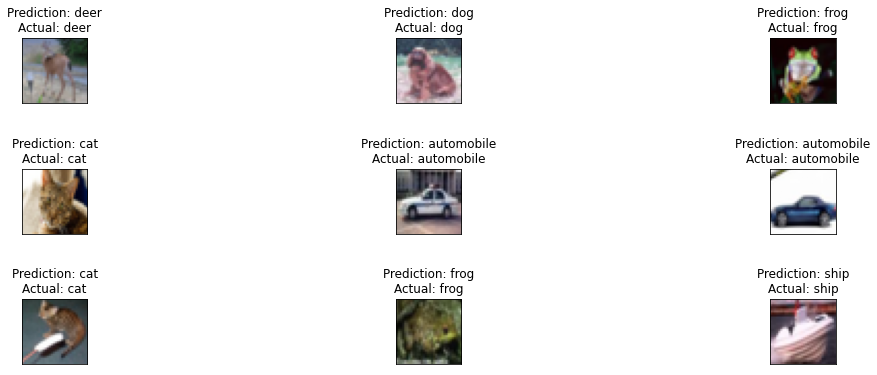

In [31]:
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    
  axs[i].imshow(img)
    

plt.show()